# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,14,94,49,79,203,71,5,174,37,21,154,196,465,206,71,6,2,197,199
1,588,89,38,78,153,61,7,146,46,19,127,166,314,142,69,0,9,187,194
2,657,89,45,85,149,59,11,158,43,20,158,177,362,173,75,12,16,183,193
3,678,86,45,70,122,56,7,148,45,19,144,170,324,186,84,9,5,180,183
4,779,96,39,64,111,48,8,134,52,18,141,160,258,139,80,7,20,183,184
5,11,90,34,66,136,55,6,123,54,17,118,148,224,118,65,5,26,196,202
6,688,89,35,52,121,57,4,122,55,17,125,139,220,128,82,5,13,181,184
7,213,104,49,89,168,54,4,212,31,24,153,238,682,198,78,1,23,190,189
8,94,84,45,66,154,65,6,145,46,19,144,168,312,177,73,2,3,184,188
9,303,89,36,68,149,60,8,133,50,18,134,153,265,119,62,6,18,201,209


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.690346,93.834244,44.859745,82.114754,168.575592,61.428051,8.340619,168.466302,40.989071,20.553734,147.987250,188.213115,437.834244,174.932605,72.324226,6.413479,12.145719,189.014572,195.602914
std,245.261187,8.224931,6.127031,15.660971,33.861195,6.819413,3.248049,32.816361,7.789888,2.545808,14.383747,31.153554,174.296270,32.728492,7.103033,4.972395,8.930014,6.293590,7.631982
min,0.000000,77.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,214.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,167.000000,318.000000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,420.000000,93.000000,44.000000,80.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,72.000000,5.000000,11.000000,189.000000,196.000000
75%,638.000000,100.000000,49.000000,98.000000,197.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,587.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,333.000000,138.000000,49.000000,262.000000,59.000000,28.000000,188.000000,320.000000,987.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE

#Encoding labes from non-numerical values of target
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test) 

print(y_train)
print(y_test)

[0 1 3 0 3 2 2 0 0 3 2 0 3 1 2 0 1 2 2 3 3 3 2 2 2 1 0 2 1 1 0 0 0 1 3 3 3
 2 0 1 0 3 2 3 0 3 3 2 0 0 2 2 0 1 1 0 2 1 2 0 1 3 3 3 2 1 0 3 2 1 1 3 0 3
 1 0 2 3 1 0 2 1 2 3 1 1 3 0 2 2 1 3 0 2 2 3 3 0 2 3 0 3 0 1 0 3 3 1 0 2 3
 3 2 0 3 0 2 2 1 2 0 0 3 1 0 1 0 1 0 1 1 3 0 0 1 1 2 0 2 1 2 3 0 0 0 0 1 0
 0 0 1 2 2 2 3 0 1 2 2 3 3 3 1 2 2 1 0 2 2 1 3 0 1 1 3 1 1 1 3 2 3 3 0 3 1
 0 3 1 0 2 1 2 2 3 0 3 0 0 3 0 1 0 3 1 2 2 0 2 3 1 0 1 3 0 3 0 0 2 3 0 0 2
 1 1 0 0 3 1 2 0 2 2 2 3 1 0 3 0 0 3 3 2 3 3 2 0 0 1 1 2 2 1 2 2 3 3 0 0 3
 2 0 0 2 2 1 0 2 2 2 3 0 1 0 1 2 0 3 3 3 3 1 1 3 0 0 1 0 2 0 0 2 2 1 1 1 1
 0 0 3 3 0 0 2 1 2 1 2 2 3 0 1 2 1 3 2 0 2 0 3 1 0 1 1 1 1 0 1 2 1 3 3 1 2
 1 2 2 0 3 1 2 1 2 3 3 1 2 2 0 1 2 2 3 1 1 1 3 2 2 2 2 1 3 3 2 2 1 1 3 3 0
 3 1 3 0 3 3 3 1 0 2 3 3 1 1 1 3 0 1 0 2 3 2 0 2 1 0 0 0 0 1 0 3 0 0 1 3 0
 3 1 3 3 2 1 2 0 2 1 1 3 1 0 1 3 1 3 0 1 2 2 3 3 0 3 1 0 0 3 1 3 3 3 1 0 2
 0 0 2 0 2 2 1 2 2 2 0 0 3 3 0 3 2 1 3 1 3 1 0 1 2 2 3 0 3 2 0 0 2 0 1 1 1
 2 2 3 3 2 2 0 2 3 1 0 1 

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
### YOUR CODE HERE

'''***************** Check bellow, in the next few cells my solution is presented and explained! '''

'***************** Check bellow, in the next few cells my solution is presented and explained! '

## My solution

## Finding optimal hyperparameters for C and penalty norm 

Cross validation grid search is used for a set of 20 different (along a logarithmic base 10 scale) values for C and for l2 and l1 norms, using as scoring f1 and accuracy.
Two estimators are refitted relative to the best f1 and accuracy score, 
the scores are compared and the final model, with its optimal hyperparameters, is choosen as the one that yields the best score along with its hyperparameters


In [8]:
from sklearn.linear_model import LogisticRegression 

logreg_clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
print(logreg_clf)


from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-4, 4, 20)
penalty_range = np.array(['l2', 'l1'])
grid_search_CV_parameters = {
        'C':C_range,
        'penalty':penalty_range
        }
scoring = {'f1':'f1_micro','accuracy':'accuracy'}

LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga',
                   tol=0.001)


In [9]:
#**************First refitting relative to the best f1 score

gridsearchCV_result = GridSearchCV(logreg_clf, grid_search_CV_parameters, verbose = 1,
                           cv = 5 , scoring = scoring, refit = 'f1' , n_jobs=-1 )

print(gridsearchCV_result)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': array(['l2', 'l1'], dtype='<U2')},
             refit='f1', scoring={'accuracy': 'accuracy', 'f1': 'f1_micro'},
             verbose=1)


In [10]:
#Performing cross validated grid search and refitting relative to the best f1 score 
gridsearchCV_result.fit(X_train, y_train) 

best_estimator_forf1 = gridsearchCV_result.best_estimator_
best_f1score = gridsearchCV_result.best_score_
best_estimator_params_forf1 = gridsearchCV_result.best_params_
print(f'''
##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for f1 =\n{best_estimator_forf1}
*****Grid search-CV best f1 score = {best_f1score}
*****Grid search-CV best parameters for best estimator refitted for f1 = {best_estimator_params_forf1}
''')

Fitting 5 folds for each of 40 candidates, totalling 200 fits

##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for f1 =
LogisticRegression(C=0.012742749857031334, max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001)
*****Grid search-CV best f1 score = 0.7122101751459551
*****Grid search-CV best parameters for best estimator refitted for f1 = {'C': 0.012742749857031334, 'penalty': 'l2'}



In [11]:
#**************Now refitting relative to the best accuracy score

gridsearchCV_result = GridSearchCV(logreg_clf, grid_search_CV_parameters, verbose = 1,
                           cv = 5 , scoring = scoring, refit = 'accuracy' , n_jobs=-1 )

print(gridsearchCV_result)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': array(['l2', 'l1'], dtype='<U2')},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_micro'}, verbose=1)


In [12]:
#Performing cross validated grid search and refitting relative to the best accuracy score 
gridsearchCV_result.fit(X_train, y_train) 

best_estimator_foraccuracy = gridsearchCV_result.best_estimator_
best_accuracyscore = gridsearchCV_result.best_score_
best_estimator_params_foraccuracy = gridsearchCV_result.best_params_
print(f'''
##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for accuracy =\n{best_estimator_foraccuracy}
*****Grid search-CV best accuracy score = {best_accuracyscore}
*****Grid search-CV best parameters for best estimator refitted for accuracy = {best_estimator_params_foraccuracy}
''')

Fitting 5 folds for each of 40 candidates, totalling 200 fits

##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for accuracy =
LogisticRegression(C=0.012742749857031334, max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001)
*****Grid search-CV best accuracy score = 0.7122101751459551
*****Grid search-CV best parameters for best estimator refitted for accuracy = {'C': 0.012742749857031334, 'penalty': 'l2'}



In [13]:
#Comparing the best scores of the two estimators, and selecting the one with the best score along with its optimal hyperparameters 

if (max(best_f1score, best_accuracyscore) == best_accuracyscore ):
    logreg_clf = best_estimator_foraccuracy
    optC = best_estimator_params_foraccuracy['C']
    optpenalty = best_estimator_params_foraccuracy['penalty']
else:
    logreg_clf = best_estimator_forf1
    optC = best_estimator_params_forf1['C']
    optpenalty = best_estimator_params_forf1['penalty']
    
print(f"Estimator = {logreg_clf},\nOptimal hyperparameters -> C = {optC}, penalty = {optpenalty}") 

Estimator = LogisticRegression(C=0.012742749857031334, max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001),
Optimal hyperparameters -> C = 0.012742749857031334, penalty = l2


## Estimating the model quality using f1 and accuracy score 

In [14]:
#Doing some predictions with the classifier and printing scores 

y_pred = logreg_clf.predict(X_test)

###################################################
### Counting missclasified samples and calculating accuracy score
##################################################
from sklearn.metrics import accuracy_score, f1_score, classification_report

f1 = f1_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)
missclfd = ( y_pred != y_test ).sum()


print(f'''
#######################################################
***** Missclassified count = {missclfd} testing samples out of {len(y_test)} testing samples ,
***** Missclassified percentage = {((missclfd / len(y_test)) * 100.0):.2f} %
***** f1 score = {f1}
***** Accuracy Score = {accuracy}
#######################################################  
''')
print(f'''
######################################
### Classification Report for optimal hyperparamenter C = {optC}, penalty = {optpenalty} 
######################################
{classification_report(y_test, y_pred)}
      ''')


#######################################################
***** Missclassified count = 82 testing samples out of 297 testing samples ,
***** Missclassified percentage = 27.61 %
***** f1 score = 0.7239057239057239
***** Accuracy Score = 0.7239057239057239
#######################################################  


######################################
### Classification Report for optimal hyperparamenter C = 0.012742749857031334, penalty = l2 
######################################
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.65      0.58      0.61        79
           2       0.69      0.52      0.59        79
           3       0.77      0.98      0.86        64

    accuracy                           0.72       297
   macro avg       0.72      0.74      0.72       297
weighted avg       0.72      0.72      0.71       297

      


## Plotting the ROC-curve for the trained model 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

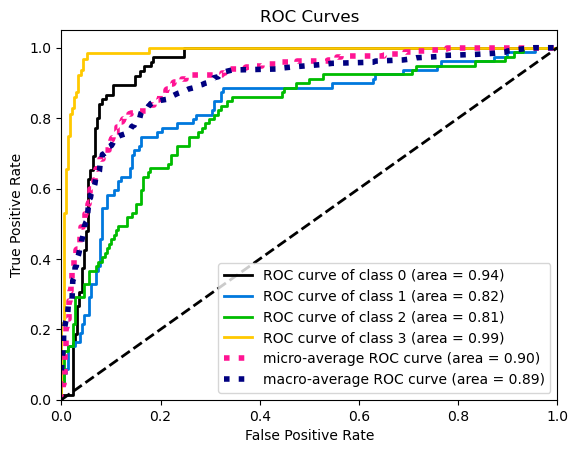

In [15]:
import scikitplot as skplt

y_proba = logreg_clf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_proba)

In [16]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [17]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [18]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [19]:
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [20]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [21]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [23]:
# YOUR CODE HERE